In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../../")
print(os.getcwd())

C:\Users\Milosz\thesis-recsys


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [3]:
metrics_path = "runs/GraphSAGE/2023-11-12_19-00-00"
metrics_deep_path = "runs/DeepFM/2023-11-16_20-00-00"
metrics_deep_complex_path = "runs/DeepFM/2023-11-16_20-30-00"
metrics_mf_path = "runs/MF/2023-11-16_22-00-00"
metrics_GATConv_path = "runs/GATConv/2023-11-17_18-27-40"

with open(os.path.join(metrics_path, 'output_metrics.pkl'), "rb") as f:
    GraphSAGE_output_metrics = pd.read_pickle(f)

with open(os.path.join(metrics_deep_path, 'output_metrics.pkl'), "rb") as f:
    DeepFM_output_metrics = pd.read_pickle(f)

with open(os.path.join(metrics_deep_complex_path, 'output_metrics.pkl'), "rb") as f:
    DeepFMComplex_output_metrics = pd.read_pickle(f)

with open(os.path.join(metrics_mf_path, 'output_metrics.pkl'), "rb") as f:
    MF_output_metrics = pd.read_pickle(f)

with open(os.path.join(metrics_GATConv_path, 'output_metrics.pkl'), "rb") as f:
    GATConv_output_metrics = pd.read_pickle(f)

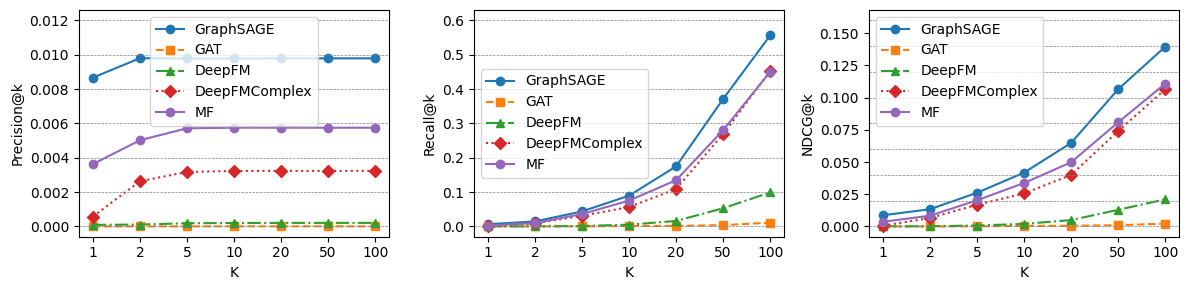

In [4]:
def plot_metrics(models_metrics, x_ticks):
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D']

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

    for i, (metric_name, metric_label) in enumerate(zip(['precision', 'recall', 'ndcg'], ['Precision@k', 'Recall@k', 'NDCG@k'])):
        for j, (model, metrics) in enumerate(models_metrics.items()):
            axes[i].plot(np.array(x_ticks).astype('str'), metrics[metric_name], label=model,
                         linestyle=line_styles[j % len(line_styles)], marker=markers[j % len(markers)])

        axes[i].set_xlabel('K')
        axes[i].set_ylabel(metric_label)

        for y_tick in axes[i].get_yticks()[1:]:
            axes[i].axhline(y_tick, color='gray', linestyle='--', linewidth=0.5)
        
        axes[i].legend()

    plt.tight_layout()
    plt.show()

models_metrics = {
    'GraphSAGE': GraphSAGE_output_metrics,
    "GAT": GATConv_output_metrics,
    "DeepFM": DeepFM_output_metrics,
    "DeepFMComplex": DeepFMComplex_output_metrics,
    "MF": MF_output_metrics,
}
K = [1, 2, 5, 10, 20, 50, 100]
plot_metrics(models_metrics, K)